In [10]:
# import packages

import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from mlxtend.frequent_patterns import apriori, fpgrowth
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [11]:
# set file location

file_loc = Path.home()/'Desktop'/'CDS303'
print("file location exists:", file_loc.is_dir())

file location exists: True


In [13]:
# import dataset 

df = pd.read_csv(file_loc/'titanic.csv')
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
# find out number of rows and columns
num_rows, num_col = df.shape

print('Number of rows: ', num_rows)
print('Number of columns: ', num_col)

Number of rows:  891
Number of columns:  16


In [20]:
# find null values

null_counts = df.isnull().sum()
features = null_counts[null_counts>0]
print("These are the features with null values, and the count of null values in each.")
print(features)

These are the features with null values, and the count of null values in each.
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [22]:
# Impute missing 'age' values based on another ('who') column, and check

category_means = df.groupby('who')['age'].transform('mean')
df1 = df.copy()
df1['age'].fillna(category_means, inplace=True)
childstat = df1[df1['who'] == 'child'].describe()
print(childstat)


       Unnamed: 0   survived     pclass        age      sibsp      parch  \
count   83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
mean   430.602410   0.590361   2.626506   6.369518   1.734940   1.265060   
std    287.079319   0.494757   0.619024   4.729063   1.638592   0.682255   
min      7.000000   0.000000   1.000000   0.420000   0.000000   0.000000   
25%    171.500000   0.000000   2.000000   2.000000   0.000000   1.000000   
50%    435.000000   1.000000   3.000000   5.000000   1.000000   1.000000   
75%    705.500000   1.000000   3.000000   9.500000   3.000000   2.000000   
max    875.000000   1.000000   3.000000  15.000000   5.000000   2.000000   

             fare  
count   83.000000  
mean    32.785795  
std     33.466438  
min      7.225000  
25%     15.900000  
50%     26.250000  
75%     32.193750  
max    211.337500  


In [24]:
# try a quick association rule to see if there is some pattern to deck = NaN
# first we create a categories dataframe

df_categories = df1.drop(['pclass', 'sibsp', 'parch', 'Unnamed: 0', 'embarked', 'sex', 'age', 'fare', 'alive', 'adult_male'],axis = 1)
df_categories

,survived,class,who,deck,embark_town,alone
0,0,Third,man,NaN,Southampton,False
1,1,First,woman,C,Cherbourg,False
2,1,Third,woman,NaN,Southampton,True
3,1,First,woman,C,Southampton,False
4,0,Third,man,NaN,Southampton,True
...,...,...,...,...,...,...
886,0,Second,man,NaN,Southampton,True
887,1,First,woman,B,Southampton,True
888,0,Third,woman,NaN,Southampton,False
889,1,First,man,C,Cherbourg,True


In [26]:
# then we encode the category columns

cat_columns = ['class', 'who', 'deck', 'embark_town']
df_categories = df1[cat_columns]
codes = cat_encoder.fit_transform(df_categories)
names = cat_encoder.get_feature_names_out(cat_columns)
encoded_df = pd.DataFrame(codes.todense(), columns = names)
encoded_df

,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
# then we clean things up a bit
# Check the column labels in df_categories

df2 = pd.merge(encoded_df, df1[['survived', 'alone']], left_index=True, right_index=True)
df2['alone'].replace([True, False], [1,0])
print(df2)

Index(['class', 'who', 'deck', 'embark_town'], dtype='object')
     class_First  class_Second  class_Third  who_child  who_man  who_woman  \
0            0.0           0.0          1.0        0.0      1.0        0.0   
1            1.0           0.0          0.0        0.0      0.0        1.0   
2            0.0           0.0          1.0        0.0      0.0        1.0   
3            1.0           0.0          0.0        0.0      0.0        1.0   
4            0.0           0.0          1.0        0.0      1.0        0.0   
..           ...           ...          ...        ...      ...        ...   
886          0.0           1.0          0.0        0.0      1.0        0.0   
887          1.0           0.0          0.0        0.0      0.0        1.0   
888          0.0           0.0          1.0        0.0      0.0        1.0   
889          1.0           0.0          0.0        0.0      1.0        0.0   
890          0.0           0.0          1.0        0.0      1.0        0.0   



In [34]:
# then we do some association rule mining using apriori and print the results

results = apriori(df2, min_support = .1)
results = results[(results['itemsets'].apply(lambda x: len(x)) > 2) & (results['itemsets'].apply(lambda x: 'deck_nan' in x))]
print(results)

Empty DataFrame
Columns: [support, itemsets]
Index: []


/Users/sushobhitaparamathmuni/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
# let's look at a subset of the data we suspect is most closely related to deck = NaN
# we want to filter to: who = man, embark town = southampton, alone = true and class_third = true
# we want the resulting table to just show the counts of each variable after filtering

df2[(df2['who_man'] == True)].sum()

class_First                119.0
class_Second                99.0
class_Third                319.0
who_child                    0.0
who_man                    537.0
who_woman                    0.0
deck_A                      13.0
deck_B                      19.0
deck_C                      31.0
deck_D                      15.0
deck_E                      16.0
deck_F                       5.0
deck_G                       0.0
deck_nan                   438.0
embark_town_Cherbourg       90.0
embark_town_Queenstown      37.0
embark_town_Southampton    410.0
embark_town_nan              0.0
survived                    88.0
alone                      410.0
dtype: float64

In [37]:
# join df1 and df2 for analysis like clustering, correlation, and pca

df3 = pd.concat([df1[['age', 'fare']], df2], axis=0)
df3

,age,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,...,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,survived,alone
0,22.0,7.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38.0,71.2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26.0,7.9250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.0,53.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35.0,8.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,True
887,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,True
888,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False
889,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True


In [41]:
# normalize age and fare, so they don't bias our clustering and correlation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[['age','fare']] = scaler.fit_transform(df3[['age','fare']])
print(df3)

          age      fare  class_First  class_Second  class_Third  who_child  \
0    0.271174  0.014151          NaN           NaN          NaN        NaN   
1    0.472229  0.139136          NaN           NaN          NaN        NaN   
2    0.321438  0.015469          NaN           NaN          NaN        NaN   
3    0.434531  0.103644          NaN           NaN          NaN        NaN   
4    0.434531  0.015713          NaN           NaN          NaN        NaN   
..        ...       ...          ...           ...          ...        ...   
886       NaN       NaN          0.0           1.0          0.0        0.0   
887       NaN       NaN          1.0           0.0          0.0        0.0   
888       NaN       NaN          0.0           0.0          1.0        0.0   
889       NaN       NaN          1.0           0.0          0.0        0.0   
890       NaN       NaN          0.0           0.0          1.0        0.0   

     who_man  who_woman  deck_A  deck_B  ...  deck_E  deck_F  d

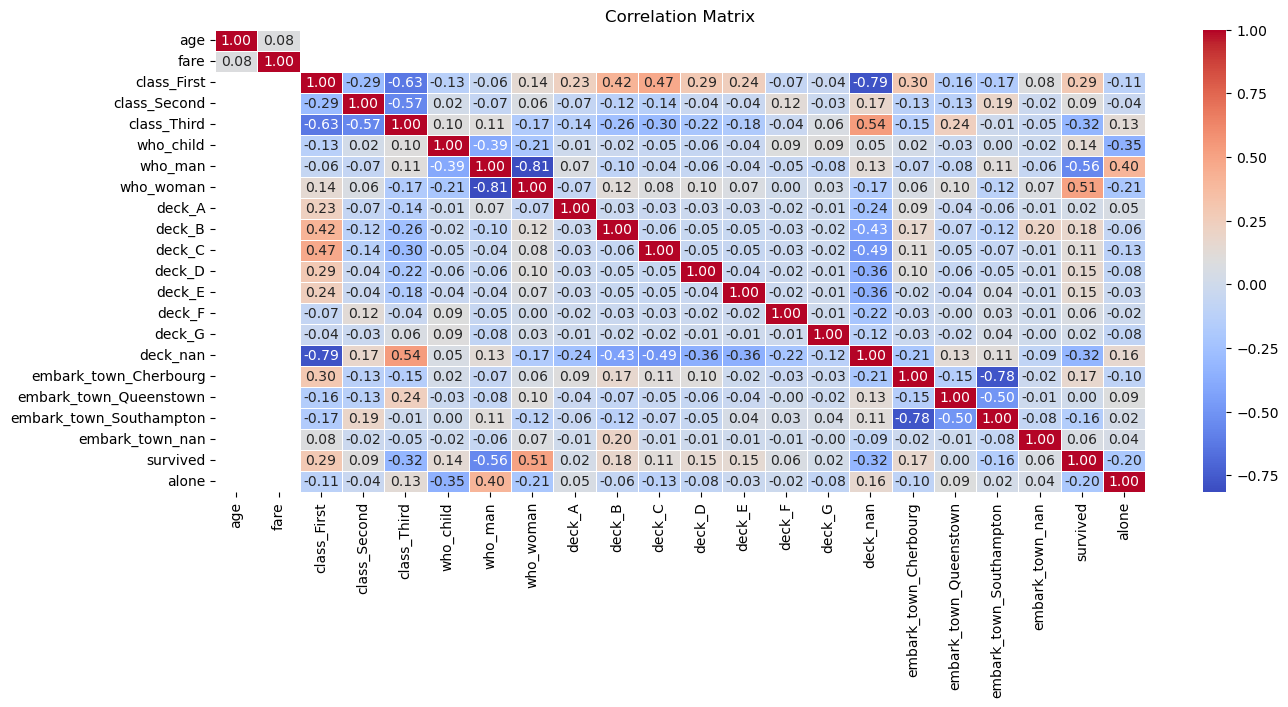

In [42]:
# discover correlations 

corr_matrix = df3.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()